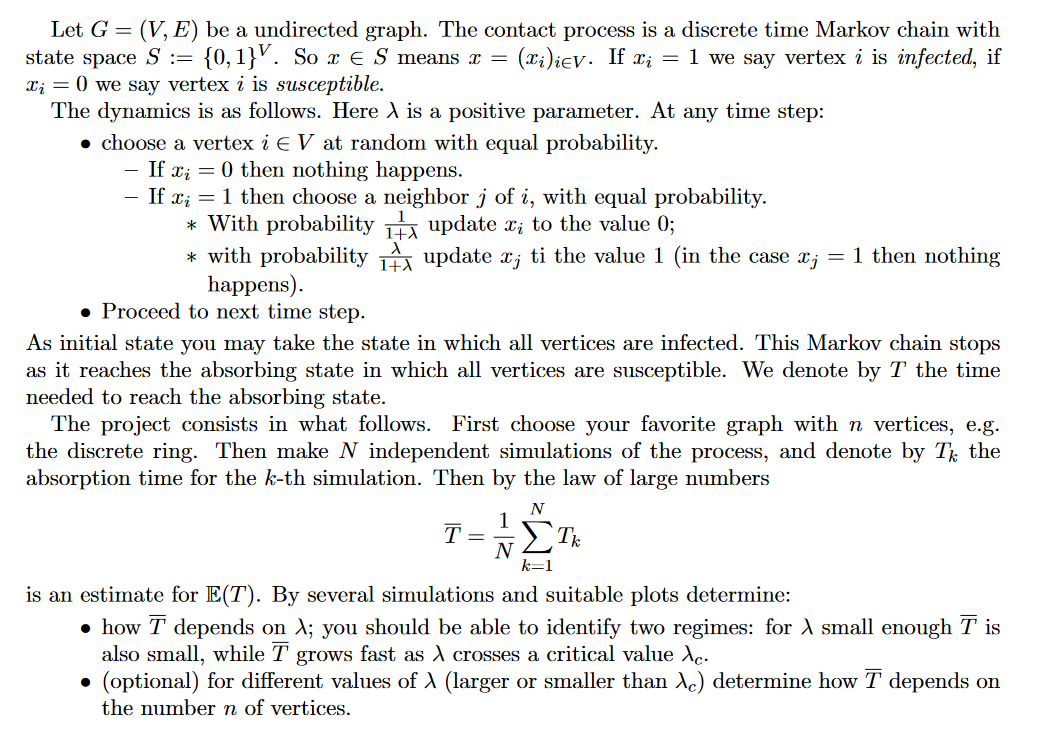

In [60]:
import numpy as np
import pandas as pd
import networkx as nx
import os
import time
import timeit
import matplotlib.pyplot as plt

In [2]:
def build_initial_graph(N, perc):

    mat = np.zeros((N, N), dtype = int)
    for i in range(1, mat.shape[0] - 1):
        mat[i][i - 1] = 1
        mat[i][i + 1] = 1
    mat[0][1] = 1
    mat[0][-1] = 1
    mat[-1][0] = 1
    mat[-1][-2] = 1
    
    initially_susceptible = np.full(N, 'S')
    initially_infected = int(N*perc)
    for i in range(initially_infected):
        initially_susceptible[i] = 'I'
    np.random.shuffle(initially_susceptible)
    
    return mat, initially_susceptible

In [3]:
def plot_graph(mat, initially_susceptible):
    G = nx.from_numpy_matrix(mat)
    color = np.full(len(initially_susceptible), ['blue'])
    
    for i in range(len(initially_susceptible)):
        if initially_susceptible[i] == 'I':
                    color[i] = 'red'
    nx.draw(G, node_color = color)
    return

In [4]:
one, initially_sus = build_initial_graph(5, 1)

In [5]:
one

array([[0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 0, 0, 1, 0]])

In [6]:
initially_sus

array(['I', 'I', 'I', 'I', 'I'], dtype='<U1')

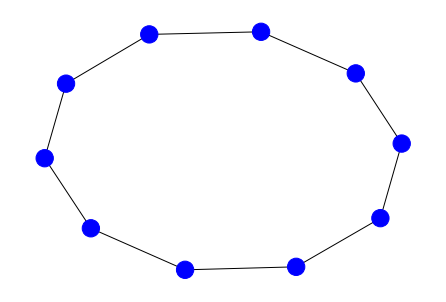

In [50]:
plot_graph(one, initially_sus)

In [12]:
tic=timeit.default_timer()
# Do Stuff
toc=timeit.default_timer()
T = toc - tic #elapsed time in seconds

In [8]:
# actual algorithm here

def contact_process(matrix, initial_distribution, lambda_p):
    N = matrix.shape[0]
    V = matrix.shape[0]
    tic = timeit.default_timer()
    while(np.any(initial_distribution == 'I')):                     # while there are infected vertices
        row_number = np.random.randint(0, N)                        # select a random vertex
        if initial_distribution[row_number] == 'S':                 # if the vertex is susceptible => nothing happens
            continue
        else:                                                       # the vertex selected is infected => pick a neighbor vertex
            if row_number == 0:
                neighbor = np.random.choice([initial_distribution[row_number + 1], initial_distribution[V - 1]])
            elif row_number == V:
                neighbor = np.random.choice([initial_distribution[0], initial_distribution[row_number - 1]])
            else:
                neighbor = np.random.choice([initial_distribution[row_number - 1], initial_distribution[row_number]], 1)
            
            update_prob = np.random.choice(2, 1, p = [1/(1+lambda_p), lambda_p/(1+lambda_p)])
            if update_prob == 0:  # first choice => node becomes susceptible
                initial_distribution[row_number] = 'S'
            else:                 # second choice => node stays infected and nothing happens 
                continue
    toc = timeit.default_timer()
    T = toc - tic
    return T

Cycle over different lambdas here to test the algorithm. 

In [74]:
one, initially_sus = build_initial_graph(10, 1)
T1 = contact_process(one, initially_sus, 1)

In [31]:
T1

0.006583934999980556

In [32]:
one, initially_sus = build_initial_graph(10, 1)
T2 = contact_process(one, initially_sus, 2)

In [33]:
T2

0.015036594999969566

In [34]:
one, initially_sus = build_initial_graph(10, 1)
T10 = contact_process(one, initially_sus, 10)

In [35]:
T10

0.014483380000001489

In [36]:
one, initially_sus = build_initial_graph(10, 1)
T20 = contact_process(one, initially_sus, 20)

In [37]:
T20

0.0556410550000237

In [38]:
one, initially_sus = build_initial_graph(10, 1)
T50 = contact_process(one, initially_sus, 50)

In [39]:
T50

0.08722230199998648

In [40]:
one, initially_sus = build_initial_graph(10, 1)
T60 = contact_process(one, initially_sus, 60)

In [41]:
T60

0.11677219299997432

In [42]:
one, initially_sus = build_initial_graph(10, 1)
T70 = contact_process(one, initially_sus, 70)

In [43]:
T70

0.16930724600001668

In [46]:
one, initially_sus = build_initial_graph(10, 1)
T80 = contact_process(one, initially_sus, 80)

In [47]:
T80

0.10239985900000192

In [48]:
one, initially_sus = build_initial_graph(10, 1)
T1000 = contact_process(one, initially_sus, 1000)

In [49]:
T1000

2.150983735000068

In [51]:
one, initially_sus = build_initial_graph(10, 1)
T2000 = contact_process(one, initially_sus, 2000)

In [52]:
T2000

2.0359239019999222

In [53]:
one, initially_sus = build_initial_graph(10, 1)
T3000 = contact_process(one, initially_sus, 3000)

In [54]:
T3000

3.1827314749999687

In [56]:
one, initially_sus = build_initial_graph(10, 1)
T10k = contact_process(one, initially_sus, 10000)

In [57]:
T10k

16.62944129100015

In [58]:
Tn = [T1, T2, T10, T20, T50, T60, T70, T80, T1000, T2000, T3000, T10k]

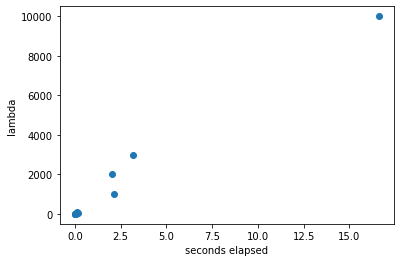

In [71]:
a = np.array(Tn)
plt.ylabel('lambda')
plt.xlabel('seconds elapsed')
plt.plot(np.average(a), marker = '+')
plt.scatter(a, y = [1, 2, 10, 20, 50, 60, 70, 80, 1000, 2000, 3000, 10000])
plt.show()

Repeating the test with a bigger graph (50 nodes)

In [75]:
one, initially_sus = build_initial_graph(50, 1)
T50_1 = contact_process(one, initially_sus, 1)
T50_1

0.019617780999851675

In [76]:
one, initially_sus = build_initial_graph(50, 1)
T50_10 = contact_process(one, initially_sus, 10)
T50_10

0.12085879699998259

In [77]:
one, initially_sus = build_initial_graph(50, 1)
T50_20 = contact_process(one, initially_sus, 20)
T50_20

0.16386885900010384

In [78]:
one, initially_sus = build_initial_graph(50, 1)
T50_50 = contact_process(one, initially_sus, 50)
T50_50

0.6582811859998401

In [79]:
one, initially_sus = build_initial_graph(50, 1)
T50_60 = contact_process(one, initially_sus, 60)
T50_60

0.743802783999854

In [80]:
one, initially_sus = build_initial_graph(50, 1)
T50_70 = contact_process(one, initially_sus, 70)
T50_70

0.9563130179999462

In [81]:
one, initially_sus = build_initial_graph(50, 1)
T50_80 = contact_process(one, initially_sus, 80)
T50_80

1.3061185240003397

In [82]:
one, initially_sus = build_initial_graph(50, 1)
T50_100 = contact_process(one, initially_sus, 100)
T50_100

1.3662431319999087

In [83]:
one, initially_sus = build_initial_graph(50, 1)
T50_200 = contact_process(one, initially_sus, 200)
T50_200

2.618553258999782

In [84]:
one, initially_sus = build_initial_graph(50, 1)
T50_1000 = contact_process(one, initially_sus, 1000)
T50_1000

7.857361170999866

In [85]:
one, initially_sus = build_initial_graph(50, 1)
T50_2000 = contact_process(one, initially_sus, 2000)
T50_2000

19.34808128299983

In [86]:
one, initially_sus = build_initial_graph(50, 1)
T50_3000 = contact_process(one, initially_sus, 3000)
T50_3000

26.514211312000043

In [87]:
one, initially_sus = build_initial_graph(50, 1)
T50_5000 = contact_process(one, initially_sus, 5000)
T50_5000

57.91556611900023

In [88]:
one, initially_sus = build_initial_graph(50, 1)
T50_10k = contact_process(one, initially_sus, 10000)
T50_10k

112.50063429300008

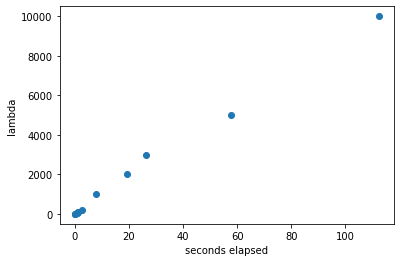

In [91]:
T50n = [T50_1, T50_10, T50_20, T50_50, T50_60, T50_70, T50_80, T50_100, T50_200, T50_1000, T50_2000, T50_3000, T50_5000, T50_10k]
b = np.array(T50n)
plt.ylabel('lambda')
plt.xlabel('seconds elapsed')
plt.scatter(b, y = [1, 10, 20, 50, 60, 70, 80, 100, 200, 1000, 2000, 3000, 5000, 10000])
plt.show()

**Conclusions.**

These two tests provided two main facts: 
- When lambda is really small, the amount of time needed to complete the process is small, too. This goes for both a small graph and a bigger one. 
- The increase in lambda can only go so far, after a certain threshold the process takes too long to complete. This threshold is lower when the number of nodes grows. In short: bigger graphs have a lower lambda critic. 

Proof: In my example, the first graph has 10 nodes and the second has 50. Both start with a configuration in which all nodes are infected. 
The biggest lambda tested is equal to 10,0000. In the first case, the algorithm completes its process in around 16.6 seconds, while it takes 112.5 to complete in the second case. If the trend is correct, this implies that the lambda critic gets smaller and smaller as the graph increases in size. 